In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data2 = pd.read_csv('clean_diabetic_data_2.csv')
data2.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
data2.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,Unknown,1.0,1.0,1.0,1.0
discharge_disposition_id,25.0,1.0,1.0,1.0,1.0
admission_source_id,1.0,7.0,7.0,7.0,7.0
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [4]:
data2.shape

(101766, 47)

In [5]:
df = data2.copy()

In [6]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'level1_diag1', 'level2_diag1', 'level1_diag2', 'level2_diag2',
       'level1_diag3', 'level2_diag3', 'med_spec'],
      dtype='object')

In [7]:
df['level1_diag1'] = df['level1_diag1'].astype(str)
df['level2_diag1'] = df['level2_diag1'].astype(str)
df['level1_diag2'] = df['level1_diag2'].astype(str)
df['level2_diag2'] = df['level2_diag2'].astype(str)
df['level1_diag3'] = df['level1_diag3'].astype(str)
df['level2_diag3'] = df['level2_diag3'].astype(str)

In [8]:
df.drop(['level2_diag1','level1_diag2','level2_diag2','level1_diag3','level2_diag3'],axis=1,inplace=True)

In [9]:
x_num = df[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']]
x_cat = df.drop(['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','readmitted'],axis=1)

In [10]:
x_num.shape

(101766, 8)

In [11]:
x_cat.shape

(101766, 33)

In [12]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_num_scaled=scaler.fit_transform(x_num)
x_num_scaled = pd.DataFrame(x_num_scaled)

In [13]:
X = pd.concat((x_num_scaled,x_cat),axis=1)
y = df.readmitted

In [14]:
X.dtypes

0                           float64
1                           float64
2                           float64
3                           float64
4                           float64
5                           float64
6                           float64
7                           float64
race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                 object
rosiglitazone                object
acarbose                    

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first',handle_unknown='error')
enc_x = enc.fit_transform(X)

In [16]:
enc_x.shape

(101766, 470)

In [17]:
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(enc_x, y, test_size = test_size, random_state = seed)

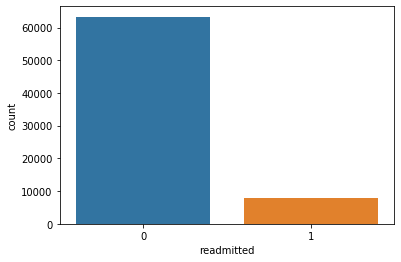

In [18]:
sns.countplot(x=y_train)
plt.show()

In [19]:
# Applying SMOTE for blancing classes
from imblearn.over_sampling import SMOTE
input1 = X_train
output1 = y_train
seed=10
oversample = SMOTE(random_state=seed)
input1,output1 = oversample.fit_resample(input1,output1)
input1.shape

(126604, 470)

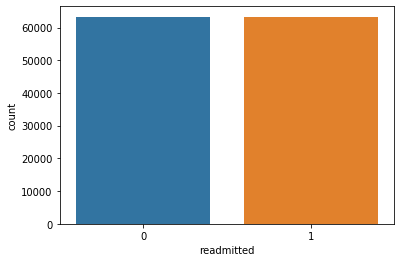

In [20]:
sns.countplot(x=output1)
plt.show()

In [21]:
X_train = input1
y_train = output1

# log reg

In [56]:
from sklearn.linear_model import LogisticRegression
seed=10
model_lr = LogisticRegression(random_state = seed, max_iter = 1000)
model_lr.fit(X_train,y_train)
pred = model_lr.predict(X_test)
from sklearn.metrics import confusion_matrix
labels = [1, 0]
con_mat = confusion_matrix(y_test, pred, labels = labels)
print(con_mat)

[[ 1881  1542]
 [ 9872 17235]]


In [57]:
# report for traning data set
from sklearn.metrics import accuracy_score, classification_report
threshold = 0.5
pred_train1 = np.where(model_lr.predict_proba(X_train)[:,1] >= threshold, 1, 0)
train_actual = y_train
pred_train = pred_train1
print ('Report : ')
print (classification_report(train_actual, pred_train))

Report : 
              precision    recall  f1-score   support

           0       0.65      0.64      0.64     63302
           1       0.64      0.65      0.65     63302

    accuracy                           0.64    126604
   macro avg       0.64      0.64      0.64    126604
weighted avg       0.64      0.64      0.64    126604



In [58]:
# report for testing set
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = pred
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.92      0.64      0.75     27107
           1       0.16      0.55      0.25      3423

    accuracy                           0.63     30530
   macro avg       0.54      0.59      0.50     30530
weighted avg       0.83      0.63      0.69     30530



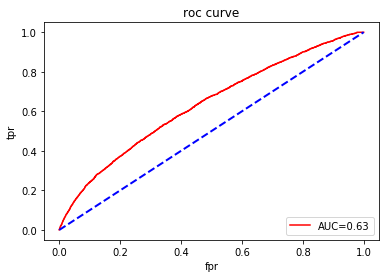

In [59]:
from sklearn.metrics import roc_curve,auc
probs=model_lr.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

(0, 1)

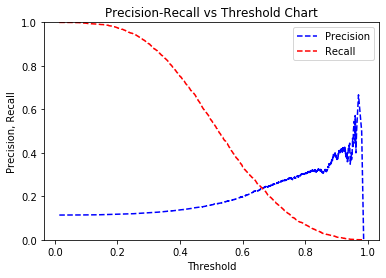

In [60]:
from sklearn.metrics import precision_recall_curve
probs = model_lr.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
random_forest = RandomForestClassifier()
rfc= random_forest.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [24]:
np.mean(y_test == rfc_pred)

0.8878152636750737

In [25]:
from sklearn.metrics import confusion_matrix
labels = [1, 0]
rfc_con_mat = confusion_matrix(y_test,rfc_pred, labels = labels)
print(rfc_con_mat)

[[    2  3421]
 [    4 27103]]


In [26]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = random_forest.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63302
           1       1.00      1.00      1.00     63302

    accuracy                           1.00    126604
   macro avg       1.00      1.00      1.00    126604
weighted avg       1.00      1.00      1.00    126604



In [27]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = random_forest.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27107
           1       0.33      0.00      0.00      3423

    accuracy                           0.89     30530
   macro avg       0.61      0.50      0.47     30530
weighted avg       0.83      0.89      0.84     30530



### Optimization

In [67]:
#incresing n_estimator to reduce overfitting
RFCbest_classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.01,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None,min_samples_leaf=6, min_samples_split=10, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=seed, warm_start=True).fit(X_train,y_train)
RFCpred3=RFCbest_classifier.predict(X_test)

In [68]:
labels = [1, 0]
rfc_con_mat2 = confusion_matrix(y_test,RFCpred3, labels = labels)
print(rfc_con_mat2)


[[ 1194  2229]
 [ 8070 19037]]


In [69]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = RFCbest_classifier.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     63302
           1       0.70      0.70      0.70     63302

    accuracy                           0.70    126604
   macro avg       0.70      0.70      0.70    126604
weighted avg       0.70      0.70      0.70    126604



In [64]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = RFCbest_classifier.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.90      0.67      0.77     27107
           1       0.13      0.39      0.20      3423

    accuracy                           0.64     30530
   macro avg       0.51      0.53      0.48     30530
weighted avg       0.81      0.64      0.70     30530



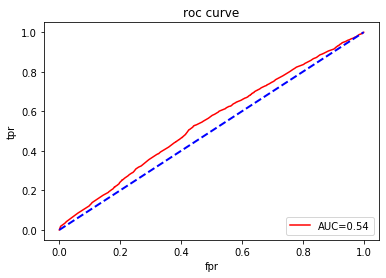

In [65]:
from sklearn.metrics import roc_curve,auc
probs2=RFCbest_classifier.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

In [66]:
importances2 =RFCbest_classifier.feature_importances_
print(importances2)

[0.         0.         0.03445566 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

# XGBoost Classifier

In [34]:
from xgboost import XGBClassifier

In [35]:
# fit model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [36]:
y_pred = xgb_model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
labels = [1, 0]
xgb_con_mat = confusion_matrix(y_test,y_pred, labels = labels)
print(xgb_con_mat)

[[   26  3397]
 [   35 27072]]


In [38]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = xgb_model.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     63302
           1       1.00      0.88      0.93     63302

    accuracy                           0.94    126604
   macro avg       0.94      0.94      0.94    126604
weighted avg       0.94      0.94      0.94    126604



In [39]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = xgb_model.predict(X_test.todense())
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27107
           1       0.11      1.00      0.20      3423

    accuracy                           0.11     30530
   macro avg       0.06      0.50      0.10     30530
weighted avg       0.01      0.11      0.02     30530



C:\Users\RISHIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.76%


# Optimisation

In [41]:
xgb_opt = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_depth=10,
              min_child_weight=1,
              n_estimators=500, n_jobs=-1, num_parallel_tree=2,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              validate_parameters=False, verbosity=None)
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=2,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [42]:
y_pred = xgb_opt.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
labels = [1, 0]
xgb_con_mat = confusion_matrix(y_test,y_pred, labels = labels)
print(xgb_con_mat)

[[   94  3329]
 [  134 26973]]


In [44]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = xgb_opt.predict(X_train)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     63302
           1       1.00      0.89      0.94     63302

    accuracy                           0.94    126604
   macro avg       0.95      0.94      0.94    126604
weighted avg       0.95      0.94      0.94    126604



In [45]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = xgb_opt.predict(X_test)
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27107
           1       0.41      0.03      0.05      3423

    accuracy                           0.89     30530
   macro avg       0.65      0.51      0.50     30530
weighted avg       0.84      0.89      0.84     30530



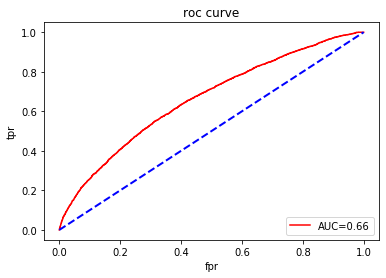

In [46]:
from sklearn.metrics import roc_curve,auc
probs2=xgb_opt.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

In [47]:
# Naive Bayes Classifier

In [48]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train.todense(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred = model.predict(X_test.todense())

In [50]:
from sklearn.metrics import confusion_matrix
labels = [1, 0]
con_mat = confusion_matrix(y_test,y_pred, labels = labels)
print(con_mat)

[[ 3305   118]
 [25504  1603]]


In [51]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = model.predict(X_train.todense())
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.84      0.06      0.11     63302
           1       0.51      0.99      0.68     63302

    accuracy                           0.52    126604
   macro avg       0.68      0.52      0.40    126604
weighted avg       0.68      0.52      0.40    126604



In [52]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = xgb_opt.predict(X_test.todense())
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27107
           1       0.11      1.00      0.20      3423

    accuracy                           0.11     30530
   macro avg       0.06      0.50      0.10     30530
weighted avg       0.01      0.11      0.02     30530



C:\Users\RISHIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 16.08%


In [54]:
# optimization

In [55]:
# report for training data
from sklearn.metrics import accuracy_score, classification_report
actual = y_train
predicted = nbc_opt.predict(X_train.todense())
print ('Report : ')
print (classification_report(actual, predicted))

NameError: name 'nbc_opt' is not defined

In [ ]:
# report for testing data
from sklearn.metrics import accuracy_score, classification_report
actual = y_test
predicted = nbc_opt.predict(X_test.todense())
print ('Report : ')
print (classification_report(actual, predicted))

In [ ]:
from sklearn.metrics import roc_curve,auc
probs2=nbc_opt.predict_proba(X_test)
preds2=probs2[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds2,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

In [70]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [71]:
svm_est = Pipeline([('scaler',StandardScaler()),('svc',SVC(probability=True, class_weight='balanced'))])

In [72]:
Cs = [0.1]
gammas = [0.01]
param_grid = dict(svc__gamma=gammas, svc__C=Cs)

In [73]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

In [74]:
from sklearn.model_selection import GridSearchCV
svm_grid_cv = GridSearchCV(svm_est, param_grid=param_grid, cv=cv)
svm_grid_cv.fit(X_train, y_train)

C:\Users\RISHIK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

  FitFailedWarning)


ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [ ]:
svm_grid_cv.best_estimator_

In [ ]:
model_svm_opt = svm_grid_cv.best_estimator_.fit(X_train,y_train)

In [ ]:
# report
pred2 = model_svm_opt.predict(X_test)
labels = [1,0]
con_mat_2 = confusion_matrix(y_test, pred2,labels=labels)
print(con_mat_2)